In [16]:
from IPython.display import Image

### Tarefas

- Introducción: Descrever por encima o projeto
- Modelagem do problema
 - Descrever o map.py (Que é #, espaço etc) Imagen dos mapas. (Mapas com pontos e sem)
- O como funçõa cada estrategia (Copiar e colar función codigo) (BFS, DFS, A*1, A*2, LBS, HILL). 
    - Descrever por cima. 
    - Limitaçoes da estrategia
- How to execute?
- Resultados 
- Conclución


# Astar Estrategy (A*)

This solution employs the best first graph search or greedy search, thus the node expansions are giving by lowest scores first policy.

This policy sort the nodes employ a mechanism that minimizes the function f(n).
For example, the breadth-first search occurs when f(n)=node.depth. 

Moreover, the function f(n) "memorize" the nodes previously computed, in order to examine the f values and recover the path. 


The followig code show the implementation of the best first graph search:

In [10]:
def best_first_graph_search(problem, f, display=False):
    # Nodes in cache
    f = memoize(f, 'f') 
    node = Node(problem.initial)
    # Priority queue giving by the lowest score in f(n)=g(n)+h(n)
    frontier = PriorityQueue('min', f)
    # Initial node
    frontier.append(node)
    explored = set()
    # While node goal different goal state
    while frontier:
        node = frontier.pop()
        # If node goal equal node state, return node
        if problem.goal_test(node.state):
            if display:
                print(len(explored), "paths have been expanded and", len(frontier), "paths remain in the frontier")
            return node
        # else, add node to the priority queue
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)
    return None

def Astar(problem, display=False):
    h = None
    h = memoize(h or problem.h, 'h')
    fn = n.path_cost + h(n)
    
    return best_first_graph_search(problem, lambda n: fn, display)
   

The astar strategy tries to expand the **node**, which is closest to the goal, and also it considers the cost to reach that **node**. This expansion policy means that the f fucntions depends on two values.

Thus, the evaluation of the nodes is done employing the function f(n):

f(n) = g(n) + h(n)
    - g(n): cost to reach each node
    - h(n): cost to get from the node to the goal
    
In this project, the g(n) is equal to the path cost.

 The path cost of this solution increse in 1 when the state change by an action. 
 
 Thus, the costs is uniform for every step in the path, since all step have the same value.

In [ ]:
   def path_cost(self, c, state1, action, state2):
        return c + 1

Also. the node evaluation is giving by a heuristic h(n), which assumes that the node closest to the goal is the faster solution. 

The following sections show the two heuristics employed in this project.

## Astar One (A*1)

The A*1 heruristic employ euclidean distance, which calcualtes straight line distance in a cartesian map. 

Thus, h(n) is calculated as:

In [12]:
def h(self, node):
    return node.state.getDistance()
    
def getDistance(self):
    v = distance.euclidean(self.pos, self.goal)
    return v

The A search is complete and optimal when the function h(n) satisfies the following conditions:

Consistent heuristic: $$h(n) \leq  c(n, a, n') + h(n')$$ 


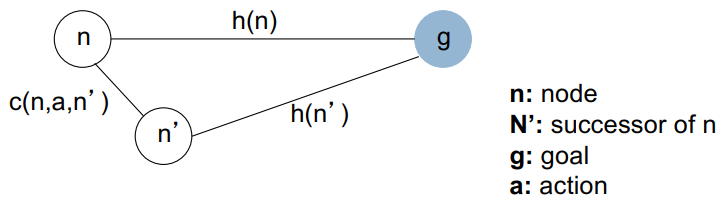

In [21]:
Image("img/consistent.png", width=500, height=300)

In this case, the steps between the actual free space and the goal space never can be longer than the
euclidean distance. This is an optimistic estimate. We profud that this is a euclidean consistent heristic doing 